In [92]:
import pandas as pd
from pandas_datareader import data as pdr
import numpy as np
import datetime as date
import matplotlib.pyplot as plt

In [93]:
enddate = date.datetime(2020,3,20)
startdate = date.datetime(2019,3,20)
tick = 'GOOGL'
data = pdr.get_data_yahoo(tick, start = startdate, end = enddate)

In [94]:
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-03-20,1229.989990,1199.589966,1201.400024,1226.430054,2075400,1226.430054
2019-03-21,1236.439941,1216.579956,1220.000000,1236.130005,1407500,1236.130005
2019-03-22,1233.630005,1206.000000,1228.849976,1207.650024,1721100,1207.650024
2019-03-25,1209.439941,1190.000000,1199.560059,1197.380005,1378800,1197.380005
2019-03-26,1207.650024,1181.760010,1205.189941,1189.839966,1537600,1189.839966


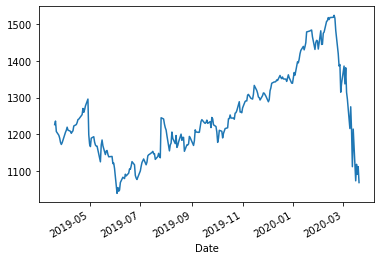

In [95]:
%matplotlib inline
data.Close.plot()

In [96]:
def BBANDS(df,n):
    MA= pd.Series(pd.Series.rolling(df['Close'], n).mean())
    MSD=pd.Series(pd.Series.rolling(df['Close'], n).std())
    b1=MA + (MSD*2)
    B1= pd.Series(b1, name = 'BollingerB_' + str(n))
    df= df.join(B1)
    b2= MA - (MSD*2)
    B2= pd.Series(b2, name = 'Bollinger%b_' + str(n))
    df = df.join(B2)
    return df

In [97]:
df = BBANDS(data,20)

In [98]:
df2 = df[['Close','BollingerB_20','Bollinger%b_20']]

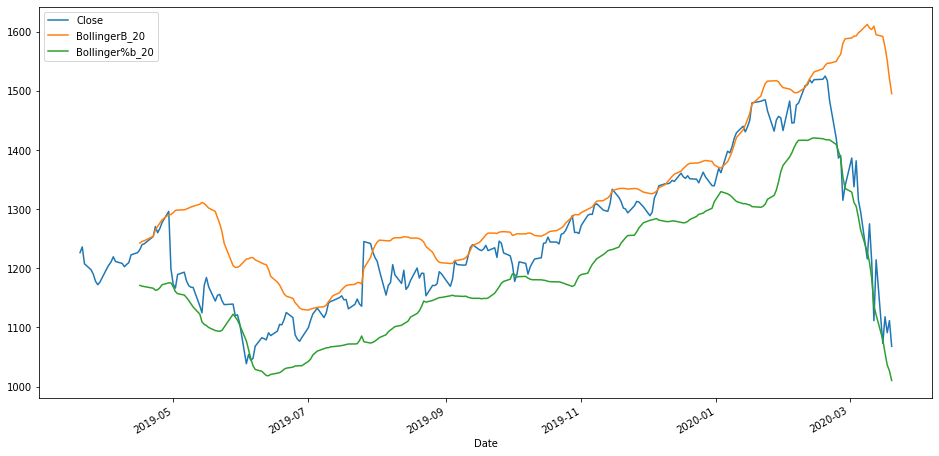

In [99]:
df2.plot(figsize = (16,8))

In [100]:
a = df['BollingerB_20']
b = df['Bollinger%b_20']

data.loc[(data['Close'] < a) & (data['Close'] > b), 'Comportamiento'] = 'Entre bandas'
data.loc[data['Close'] <b, 'Comportamiento'] = 'Cruce de banda superior'
data.loc[data['Close'] >a, 'Comportamiento'] = 'Cruce de banda inferior'

data.loc[(data['Close'] < a) & (data['Close'] > b), 'Recomendacion'] = '-'
data.loc[data['Close'] <b, 'Recomendacion'] = 'Se recomienda vender la accion.'
data.loc[data['Close'] >a, 'Recomendacion'] = 'Se recomienda comprar la accion'

data["Recomendacion"] = data["Recomendacion"].fillna("-")
data["Comportamiento"] = data["Comportamiento"].fillna("Sin informacion")
        

In [101]:
pd.set_option('display.max_rows', None)

In [102]:
data[['Close','Comportamiento', 'Recomendacion']]

,Close,Comportamiento,Recomendacion
Date,,,
2019-03-20,1226.430054,Sin informacion,-
2019-03-21,1236.130005,Sin informacion,-
2019-03-22,1207.650024,Sin informacion,-
2019-03-25,1197.380005,Sin informacion,-
2019-03-26,1189.839966,Sin informacion,-
2019-03-27,1178.010010,Sin informacion,-
2019-03-28,1172.270020,Sin informacion,-
2019-03-29,1176.890015,Sin informacion,-
2019-04-01,1198.979980,Sin informacion,-
